# **Load Data**

In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# **Exploratory Data Analysis**

In [3]:
print(df.info())
print(df.describe())

# Check columns with missing value
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Preprocessing**

In [5]:
# Drop columns that are irrelevant to the target
df.drop(columns=['PassengerId','Ticket'],inplace=True,errors='ignore')

# Fill missing value in embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Label encoding for "Sex" column (male=0, female=1)
df['Sex']=df['Sex'].map({'male':0,'female':1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


df

<ipython-input-5-d6f2391d604a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,False,False
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,False,True
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,NaN,False,True
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,B42,False,True
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,23.4500,NaN,False,True
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C148,False,False


**Feature Engineering**

In [6]:
# Create a new feature 'FamilySize' by summing siblings/spouses and parents/children aboard, plus the passenger
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 1 if the passenger is alone, 0 otherwise
df['IsAlone'] = (df['FamilySize'] == 1).astype(int) # 1=Alone

# Drop original 'SibSp' and 'Parch' columns as they are now represented by 'FamilySize' and 'IsAlone'
df.drop(columns=['SibSp', 'Parch'], inplace=True)

df

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,NaN,False,True,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C85,False,False,2,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,NaN,False,True,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,C123,False,True,2,0
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,NaN,False,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,13.0000,NaN,False,True,1,1
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,30.0000,B42,False,True,1,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,23.4500,NaN,False,True,4,0
889,1,1,"Behr, Mr. Karl Howell",0,26.0,30.0000,C148,False,False,1,1


In [7]:
# Extract the title from the 'Name' column using a regular expression
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

In [8]:
# Drop name

df.drop(columns=['Name'], inplace=True, errors='ignore')
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked_Q,Embarked_S,FamilySize,IsAlone,Title
0,0,3,0,22.0,7.2500,NaN,False,True,2,0,Mr
1,1,1,1,38.0,71.2833,C85,False,False,2,0,Mrs
2,1,3,1,26.0,7.9250,NaN,False,True,1,1,Miss
3,1,1,1,35.0,53.1000,C123,False,True,2,0,Mrs
4,0,3,0,35.0,8.0500,NaN,False,True,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,NaN,False,True,1,1,Rev
887,1,1,1,19.0,30.0000,B42,False,True,1,1,Miss
888,0,3,1,NaN,23.4500,NaN,False,True,4,0,Miss
889,1,1,0,26.0,30.0000,C148,False,False,1,1,Mr


In [9]:
# Frequency of each unique title
print(df['Title'].value_counts())


Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


In [10]:
# Create a new binary feature 'Has_Cabin' where 1 indicates the passenger had a cabin and 0 indicates they did not.
df['Has_Cabin'] = df['Cabin'].notna().astype(int)

# Drop the original 'Cabin' column as its information is now captured by the 'Has_Cabin' feature.
df.drop(columns=['Cabin'], inplace=True)

In [11]:
# prompt: Isi missing value age berdasarkan title (median)


# Calculate the median age for each title
median_age_by_title = df.groupby('Title')['Age'].median()

# Function to fill missing age based on title median
def fill_age(row):
    if pd.isnull(row['Age']):
        return median_age_by_title.get(row['Title'], df['Age'].median()) # Use global median if title not found
    return row['Age']

# Apply the fill_age function to the DataFrame
df['Age'] = df.apply(fill_age, axis=1)

# Verify that missing values in 'Age' are filled
print(df.isnull().sum())


Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked_Q    0
Embarked_S    0
FamilySize    0
IsAlone       0
Title         0
Has_Cabin     0
dtype: int64


In [12]:
# prompt: Kolom title yang (mr,mrs,miss,master) ubah jadi 0, sisanya 1

# Replace 'Mr', 'Mrs', 'Miss', 'Master' title with 0
# Replace others with 1
titles_to_zero = ['Mr', 'Mrs', 'Miss', 'Master']
df['Title'] = df['Title'].apply(lambda x: 0 if x in titles_to_zero else 1)

df

,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone,Title,Has_Cabin
0,0,3,0,22.0,7.2500,False,True,2,0,0,0
1,1,1,1,38.0,71.2833,False,False,2,0,0,1
2,1,3,1,26.0,7.9250,False,True,1,1,0,0
3,1,1,1,35.0,53.1000,False,True,2,0,0,1
4,0,3,0,35.0,8.0500,False,True,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,False,True,1,1,1,0
887,1,1,1,19.0,30.0000,False,True,1,1,0,1
888,0,3,1,21.0,23.4500,False,True,4,0,0,0
889,1,1,0,26.0,30.0000,False,False,1,1,0,1


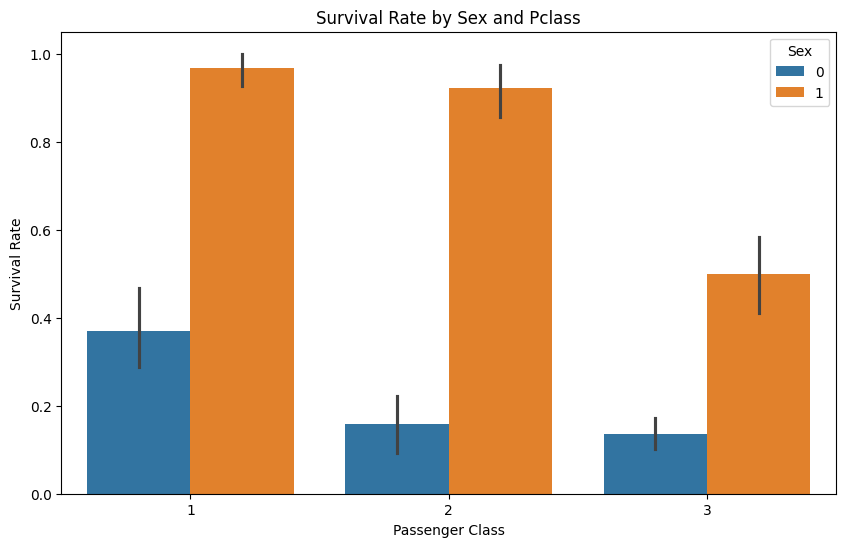

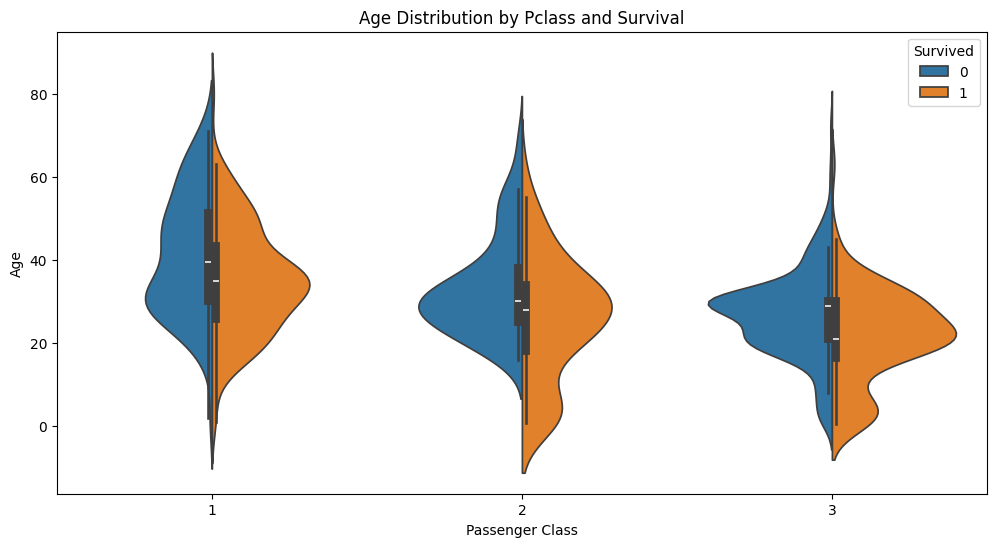

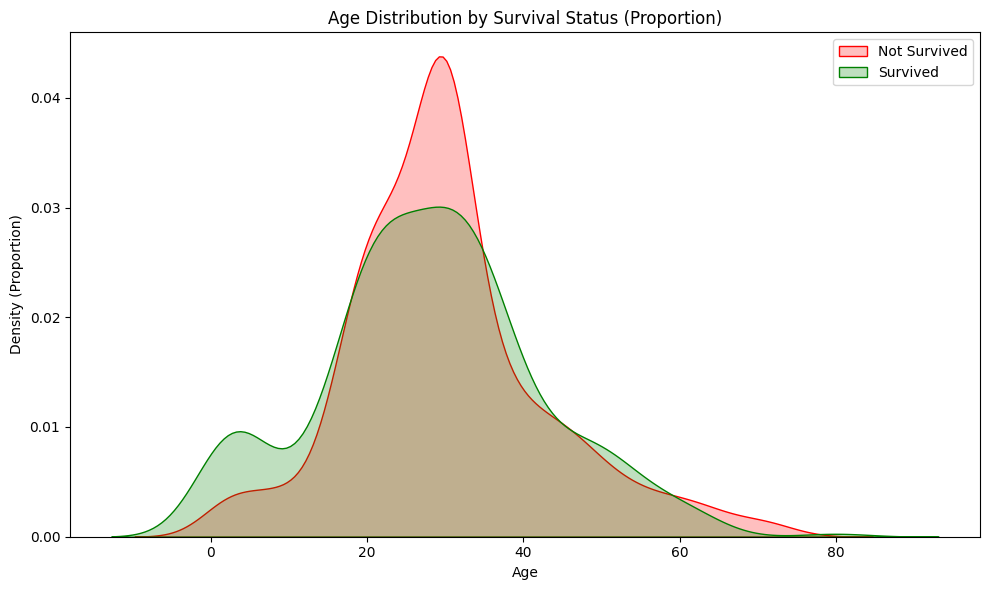

In [13]:
# Plot survival rate by Sex and Passenger Class
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title("Survival Rate by Sex and Pclass")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.legend(title='Sex')
plt.show()


# Plot age distribution by Pclass and Survival
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True)
plt.title("Age Distribution by Pclass and Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()

# Plot KDE of age for survivors and non-survivors
plt.figure(figsize=(10,6))
## KDE plot for passengers who did not survive
sns.kdeplot(df[df['Survived'] == 0]['Age'],
            label='Not Survived',
            fill=True,
            color='red',
            common_norm=False)


## KDE plot for passengers who survived
sns.kdeplot(df[df['Survived'] == 1]['Age'],
            label='Survived',
            fill=True,
            color='green',
            common_norm=False)

plt.title('Age Distribution by Survival Status (Proportion)')
plt.xlabel('Age')
plt.ylabel('Density (Proportion)')
plt.legend()
plt.tight_layout()
plt.show()


# **Modelling: Logistic Regression**

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [15]:
# Separate the dataset into features (X) and target variable (y)
X=df.drop(columns=['Survived'])
y=df['Survived']

# Split the dataset into training and testing (80% train, 20% test)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Normalize features with standard scaler
scaler=StandardScaler()
X_train_transformed=scaler.fit_transform(X_train)
X_test_transformed=scaler.transform(X_test)

In [16]:
# Modelling with Logistic Regression
model=LogisticRegression()
model.fit(X_train_transformed,y_train)
y_pred=model.predict(X_test_transformed)

# Evaluation
acc=accuracy_score(y_test,y_pred)
print(f'accuracy= {acc}')
print(classification_report(y_test,y_pred))

accuracy= 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [17]:
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

# Evaluate the model using 5-fold cross validation
scores = cross_val_score(model, X_transformed, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validated accuracy scores: [0.78212291 0.80898876 0.79213483 0.80337079 0.82022472]
Mean accuracy: 0.8013684012303057


**Tuning Parameter**

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

# Perform Grid Search with 5-fold cross-validation using accuracy as the scoring metric
grid = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5, scoring='accuracy')
grid.fit(X_transformed, y)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Val Accuracy:", grid.best_score_)


# Retrieve the best model from grid search
best_model = grid.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test_transformed)
acc_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy with GridSearchCV = {acc_best}')
print(classification_report(y_test, y_pred_best))

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Val Accuracy: 0.804732910677296
Accuracy with GridSearchCV = 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



**Compare with other models**

In [19]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
X=df.drop(columns=['Survived'])
y=df['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Dictionary of models to compare
other_models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

# Perform cross-validation for each model and display mean and standard deviation of accuracy
for name, clf in other_models.items():
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

# Print the classification report on the test set
print('\nClassification Report')
for name, clf in other_models.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(name, ':\n',classification_report(y_test,preds))

RandomForest: Mean Accuracy = 0.8092, Std = 0.0316
GradientBoosting: Mean Accuracy = 0.8361, Std = 0.0231

Classification Report
RandomForest :
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       105
           1       0.81      0.82      0.82        74

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.85      0.85      0.85       179

GradientBoosting :
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



**Feature Importance**

[-0.60297441  1.15286883 -0.45750056  0.07591694 -0.0258794  -0.14980663
 -0.48309377 -0.25673157  0.02659961  0.28460422]
      Feature  Importance
1         Sex    1.152869
0      Pclass   -0.602974
6  FamilySize   -0.483094
2         Age   -0.457501
9   Has_Cabin    0.284604
7     IsAlone   -0.256732
5  Embarked_S   -0.149807
3        Fare    0.075917
8       Title    0.026600
4  Embarked_Q   -0.025879


<ipython-input-20-256d84053f15>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='coolwarm')


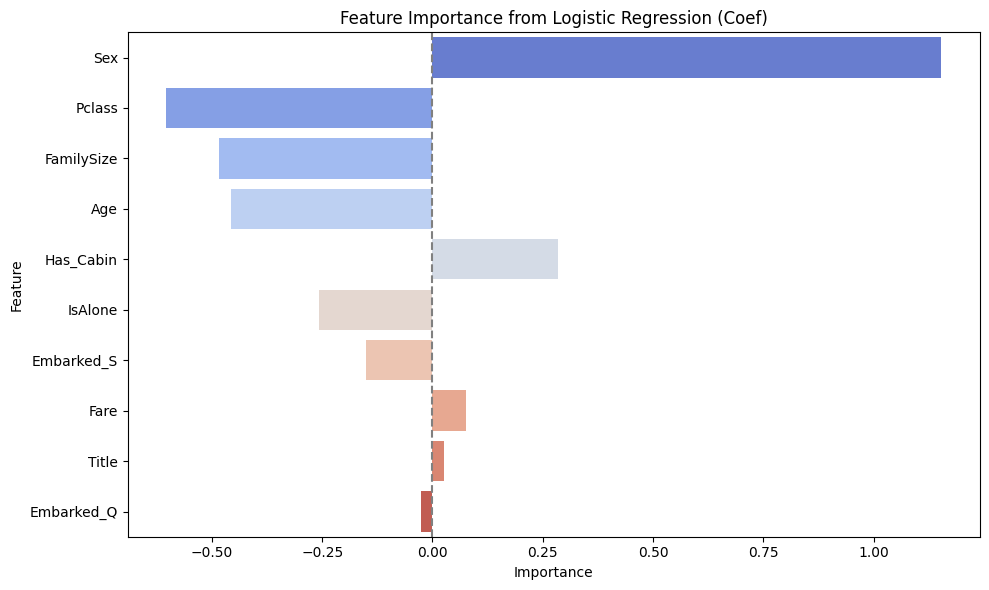

In [20]:
import numpy as np
X=df.drop(columns=['Survived','SibSp','Parch'],errors='ignore')
y=df['Survived']

## Logistic regression feature importance
feature_names = X.columns

# Retrieve coefitients from the best model (after GridSearchCV)
coefs = best_model.coef_[0]
print(coefs)

# Create a DataFrame to combine feature names and their corresponding importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefs
}).sort_values(by='Importance', key=abs, ascending=False)

print(importance_df)

# Plot the feature importance using a bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='coolwarm')
plt.title('Feature Importance from Logistic Regression (Coef)')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


      Feature  Importance
2         Age    0.261508
3        Fare    0.260219
1         Sex    0.256083
0      Pclass    0.069222
6  FamilySize    0.062362
9   Has_Cabin    0.039835
5  Embarked_S    0.021754
7     IsAlone    0.013613
4  Embarked_Q    0.008728
8       Title    0.006676


<ipython-input-21-80dfcd24e2ba>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_df, x='Importance', y='Feature', palette='viridis')


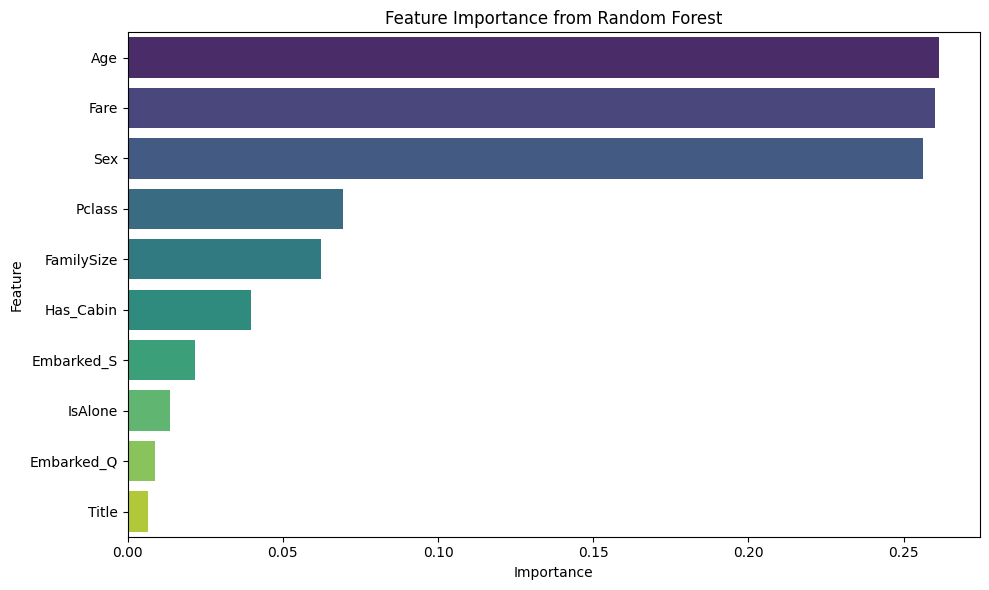

In [21]:
## Random forest feature importance

# Fit the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_transformed, y)

# Retrieve the feature importances
rf_importance = rf.feature_importances_

# Create DataFrame
rf_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

print(rf_df)

# Plot the feature importance using a bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=rf_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


      Feature  Importance
1         Sex    0.466592
3        Fare    0.143816
2         Age    0.136926
0      Pclass    0.121326
6  FamilySize    0.066776
9   Has_Cabin    0.043946
5  Embarked_S    0.015492
4  Embarked_Q    0.002917
8       Title    0.002210
7     IsAlone    0.000000


<ipython-input-22-0ce49455482d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gb_df, x='Importance', y='Feature', palette='viridis')


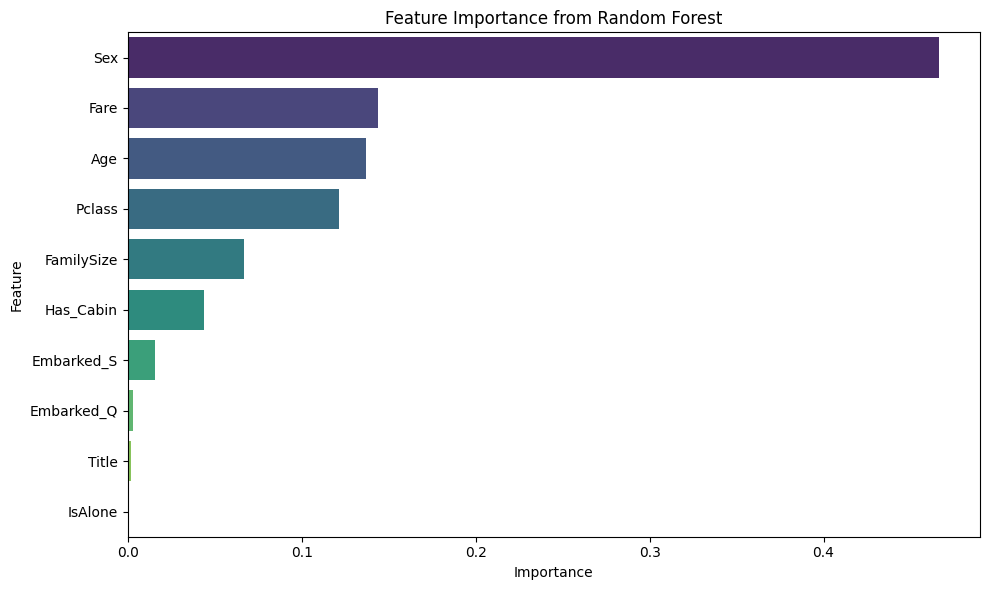

In [22]:
## GradientBoosting feature importance
# Fit the GradientBoosting model
gb = GradientBoostingClassifier()
gb.fit(X_transformed, y)

# Retrieve the feature importances
gb_importance = gb.feature_importances_

# Create DataFrame
gb_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_importance
}).sort_values(by='Importance', ascending=False)

print(gb_df)

# Plot the feature importance using a bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=gb_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


📌 Conclusion

The most influential features in predicting survival were Sex, Fare, Pclass, and Age. These insights align with historical context and social dynamics during the Titanic disaster:

Gender and Age played a crucial role, as women and children were prioritized
during evacuation:

- Female passengers had a significantly higher chance of survival compared to males.

- Children, especially those under the age of 15, also had a higher probability of survival.



Socioeconomic factors also had a clear impact:


- Passengers who paid higher fares had better chances of survival, indicating potential access to better cabins or earlier lifeboat access.

- A higher class (e.g., 1st class over 2nd or 3rd) correlated positively with survival rates, further emphasizing the role of social status.



